# DSCI 100 Group 10: Project 


# **TO DO LIST FOR INTRODUCTION** (Najris)
## - Background information on the topic so people can understand the rest of the report
## - **Clearly** state the question we are trying to answer
## - Identify and describe the dataset used to answer the question

# **TO DO LIST FOR METHODS** (All)
## - Load the data from the web (pref from the original source, github if not)
## - Tidy, clean and wrangle the data
## - Summary of the data for exploratory reasons
## - Figures of the data for exploratory reasons
## - Data analysis (throughout, have plots)
#### - Splitting the data into training and testing
#### - Creating the kknn algorithm using the training dataset (using k-folds as well)
#### - Testing the algorithm using the testing set
#### - A analysis of accuracy (metrics)
## - A final summary plot

In [1]:
install.packages("kknn")
library(repr)
library(tidyverse)
library(tidymodels)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks strin

In [2]:
#!!!This will have an issue if there is no data folder, fix later.

download.file("https://raw.githubusercontent.com/narjisaa/dsci-100-2023w1-group-10/main/data/diabetes.csv", "data/diabetes.csv")
diabetes_data <- read_csv("data/diabetes.csv")

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
# Cleaned column names
colnames(diabetes_data) <- c("pregnancies", "glucose", "blood_pressure", "skin_thickness", "insulin", "bmi", "dpf", "age", "outcome")
head(diabetes_data)

# Casted outcame into chr to change names
class(diabetes_data$outcome) = "chr"
head(diabetes_data)

pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,dpf,age,outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,dpf,age,outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


In [4]:
# Replace all 0 with NA
diabetes_data$glucose[diabetes_data$glucose == 0] <- NA
diabetes_data$skin_thickness[diabetes_data$skin_thickness == 0] <- NA
diabetes_data$insulin[diabetes_data$insulin == 0] <- NA
diabetes_data$bmi[diabetes_data$bmi == 0] <- NA
diabetes_data$dpf[diabetes_data$dpf == 0] <- NA
diabetes_data$age[diabetes_data$age == 0] <- NA

# Change all 0 to non-diabetic and all 1 to diabetic
diabetes_data$outcome[diabetes_data$outcome == 0] <- "non-diabetic"
diabetes_data$outcome[diabetes_data$outcome == 1] <- "diabetic"

# Casting outcome into factor
DIABETES_DATA <- diabetes_data |>
                 mutate(outcome = as.factor(outcome))

head(DIABETES_DATA) #~~~THIS IS THE MAIN DATASET TO BE USED, DO NOT REASSIGN.

pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,dpf,age,outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,148,72,35,NA,33.6,0.627,50,diabetic
1,85,66,29,NA,26.6,0.351,31,non-diabetic
8,183,64,NA,NA,23.3,0.672,32,diabetic
1,89,66,23,94,28.1,0.167,21,non-diabetic
0,137,40,35,168,43.1,2.288,33,diabetic
5,116,74,NA,NA,25.6,0.201,30,non-diabetic


# **TO DO LIST FOR DISCUSSION** (Norman??)
## - Summary
## - Expectations (hypothesis), impact of the finding (application to irl) and future question


# **THINGS TO KEEP IN MIND**
#### - Use set.seed()
#### - Lack of explanation for the predictor variables
#### - Visuals do not have titles or labels
#### - All figures and tables should have table/figure number and legend (when applicable)
#### - Our reasoning is off, we need to improve our reasoning

In [5]:
#get rid of NA data
DIABETES_DATA <- na.omit(DIABETES_DATA)

In [26]:
set.seed(1213)
#spliting the DIABETES_DATA
diabetes_split<-initial_split(DIABETES_DATA, prop = 0.7, strata = outcome)
diabetes_test<-testing(diabetes_split)
diabetes_train<-training(diabetes_split) 
#if the code isn't working because NA value, use the code below
#filter(!is.na(insulin))  

In [27]:
#scale and center the data
diabetes_recipe<-recipe(outcome ~ glucose+bmi+blood_pressure, data = diabetes_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

In [28]:
#V-folds(5 times)
diabetes_vfold <- vfold_cv(diabetes_train, v = 5, strata = outcome)
#K_vals(try neighbors from 1 to 20)
k_vals <- tibble(neighbors = seq(from = 1, to = 30, by = 1))
#knn_spec_tune to decide which K value we should use
knn_spec_tune <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")
#workflow to find the K values
knn_results <- workflow() |>
                 add_recipe(diabetes_recipe) |>
                 add_model(knn_spec_tune) |>
                 tune_grid(resamples = diabetes_vfold, grid = k_vals)|>
                 collect_metrics()
accuracies <- knn_results |>
  filter(.metric == "accuracy")

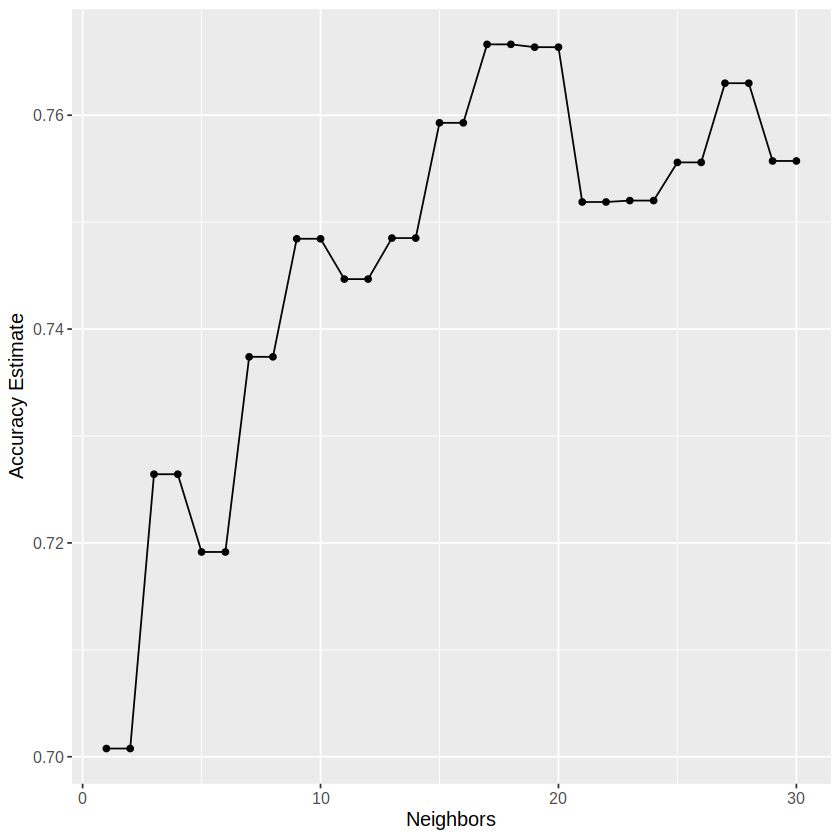

In [29]:
#select K values
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12))
accuracy_vs_k

In [35]:
#Knn_ spec with the found K value(stil deciding)
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 18) |>
            set_engine("kknn") |>
            set_mode("classification")
#fit the recipe and knn_spec
knn_fit<-workflow() |>
             add_recipe(diabetes_recipe) |>
             add_model(knn_spec) |>
             fit(data = diabetes_train)
#predict
diabetes_test_predictions <- predict(knn_fit, diabetes_test) |>
                          bind_cols(diabetes_test)
diabetes_test_predictions
#accuracy
diabetes_prediction_accuracy <- diabetes_test_predictions |>
                        metrics(truth = outcome, estimate = .pred_class)|>
                        filter(.metric == "accuracy")
diabetes_prediction_accuracy

.pred_class,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,dpf,age,outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
non-diabetic,1,89,66,23,94,28.1,0.167,21,non-diabetic
non-diabetic,0,137,40,35,168,43.1,2.288,33,diabetic
diabetic,2,197,70,45,543,30.5,0.158,53,diabetic
non-diabetic,10,125,70,26,115,31.1,0.205,41,diabetic
non-diabetic,1,97,66,15,140,23.2,0.487,22,non-diabetic
diabetic,3,158,76,36,245,31.6,0.851,28,diabetic
diabetic,3,180,64,25,70,34.0,0.271,26,non-diabetic
diabetic,8,176,90,34,300,33.7,0.467,58,diabetic
non-diabetic,7,150,66,42,342,34.7,0.718,42,non-diabetic


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7372881
